Exploratory Data Analysis project 

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
df_pat = pd.read_csv("cancer_diagnosis_data.csv")

In [3]:
print("Head of the dataset :")
print(df_pat.head())

Head of the dataset :
                             Patient_ID  Age  Gender  Tumor_Size(cm)  \
0  c044501a-43ca-4a0c-8b8b-991439ba1b6a   52  Female            5.08   
1  b8900c4c-1232-4084-9432-5d02eba74d20   32  Female            0.80   
2  3004e2bc-8037-49cb-a542-d5612b73beab   70  Female            9.56   
3  1df86af7-6745-4dea-b127-cbc9915079fc   21  Female            3.07   
4  128e00c3-72e3-4031-a7f4-1165d7199cce   62    Male            7.17   

  Tumor_Type Biopsy_Result          Treatment Response_to_Treatment  \
0     Benign      Positive            Surgery           No Response   
1     Benign      Negative            Surgery     Complete Response   
2     Benign      Positive  Radiation Therapy     Complete Response   
3  Malignant      Negative            Surgery      Partial Response   
4  Malignant      Positive  Radiation Therapy     Complete Response   

  Survival_Status  
0        Survived  
1        Survived  
2        Deceased  
3        Survived  
4        Deceased 

Checking for null values in all the columns by first using the built-in (isnull) function and then using the built-in sum function to get the number

In [4]:
print("Dataset Info :")
print(df_pat.info())

Dataset Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             20000 non-null  object 
 1   Age                    20000 non-null  int64  
 2   Gender                 20000 non-null  object 
 3   Tumor_Size(cm)         20000 non-null  float64
 4   Tumor_Type             20000 non-null  object 
 5   Biopsy_Result          20000 non-null  object 
 6   Treatment              20000 non-null  object 
 7   Response_to_Treatment  20000 non-null  object 
 8   Survival_Status        20000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.4+ MB
None


In [5]:
print("Missing Values :")
df_pat.isnull().sum()

Missing Values :


Patient_ID               0
Age                      0
Gender                   0
Tumor_Size(cm)           0
Tumor_Type               0
Biopsy_Result            0
Treatment                0
Response_to_Treatment    0
Survival_Status          0
dtype: int64

In [6]:
print("Descriptive Statistics :")
df_pat.describe()

Descriptive Statistics :


,Age,Tumor_Size(cm)
count,20000.000000,20000.000000
mean,49.964600,5.247120
std,17.511404,2.736922
min,20.000000,0.500000
25%,35.000000,2.890000
50%,50.000000,5.260000
75%,65.000000,7.592500
max,80.000000,10.000000


In [7]:
# Count of unique values in categorical columns 

categorical_cols = ['Gender', 'Tumor_Type', 'Biopsy_Result', 'Treatment', 'Response_to_Treatment', 'Survival_Status']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df_pat[col].value_counts())


Value counts for Gender:
Gender
Female    10189
Male       9811
Name: count, dtype: int64

Value counts for Tumor_Type:
Tumor_Type
Benign       10034
Malignant     9966
Name: count, dtype: int64

Value counts for Biopsy_Result:
Biopsy_Result
Positive    10016
Negative     9984
Name: count, dtype: int64

Value counts for Treatment:
Treatment
Chemotherapy         6804
Radiation Therapy    6615
Surgery              6581
Name: count, dtype: int64

Value counts for Response_to_Treatment:
Response_to_Treatment
Partial Response     6753
No Response          6713
Complete Response    6534
Name: count, dtype: int64

Value counts for Survival_Status:
Survival_Status
Survived    10067
Deceased     9933
Name: count, dtype: int64


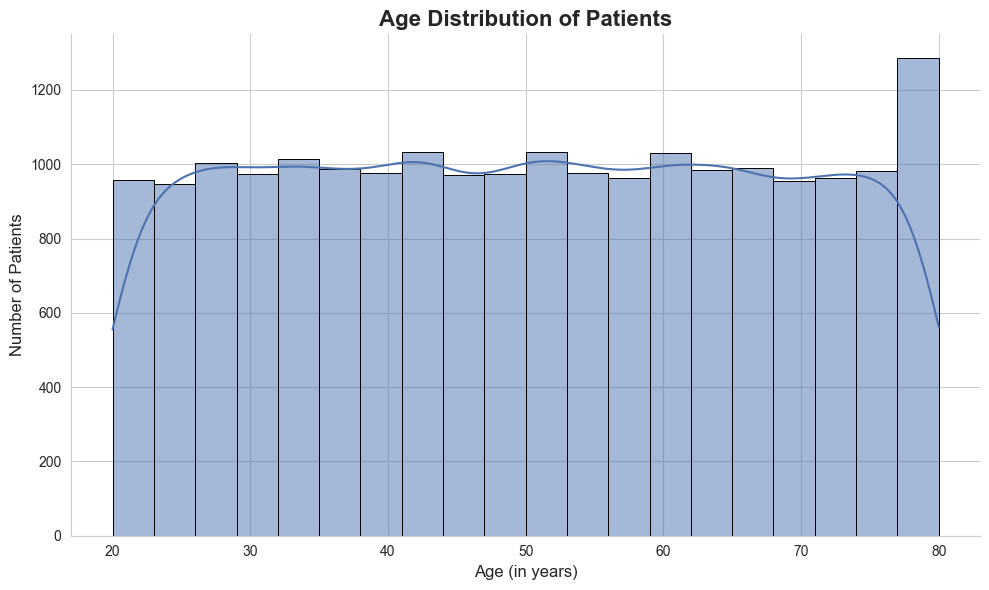

In [19]:
# 1. Age distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean, professional style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Custom color palette and updated aesthetics
sns.histplot(df_pat['Age'], bins=20, kde=True, color="#4C72B0", edgecolor='black', linewidth=0.7)

# Title and labels with better fonts and sizes
plt.title('Age Distribution of Patients', fontsize=16, fontweight='bold')
plt.xlabel('Age (in years)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Tweak tick parameters
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove top and right spines for a cleaner look
sns.despine()

# Add tight layout and show plot
plt.tight_layout()
plt.show()


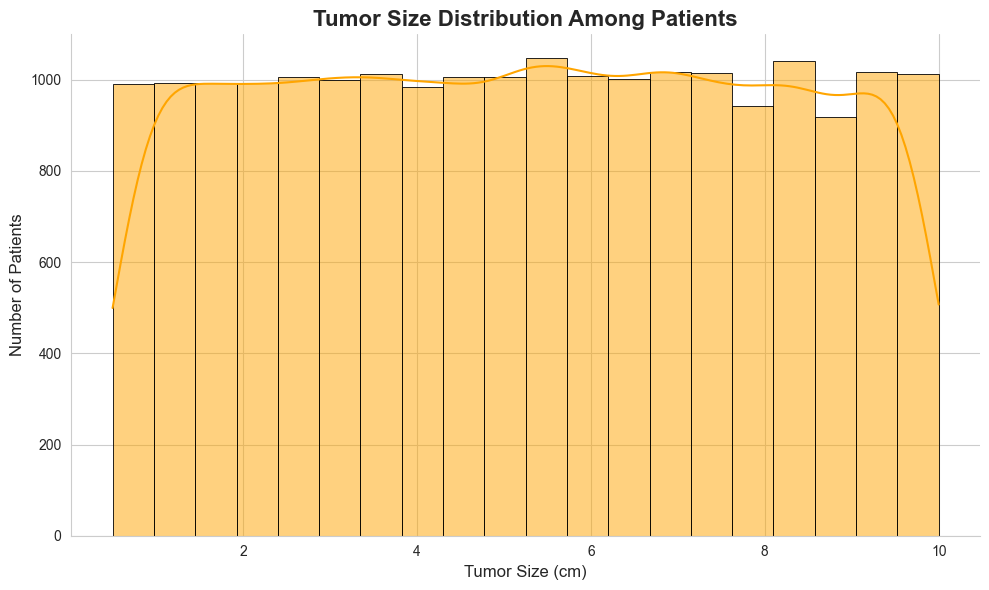

Text(0.99, 0.01, 'Anurag • Cancer Diagnosis Project')

<Figure size 640x480 with 0 Axes>

In [23]:
# Set a clean style
sns.set_style("whitegrid")

# Define figure size
plt.figure(figsize=(10, 6))

# Beautified histogram with KDE
sns.histplot(
    df_pat['Tumor_Size(cm)'], 
    bins=20, 
    kde=True, 
    color='#FFA500',  # Better orange tone
    edgecolor='black', 
    linewidth=0.6
)

# Improve title and axis labels
plt.title('Tumor Size Distribution Among Patients', fontsize=16, fontweight='bold')
plt.xlabel('Tumor Size (cm)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Tweak tick size for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Clean up spines
sns.despine()

# Layout adjustment
plt.tight_layout()

# Show plot
plt.show()

plt.figtext(0.99, 0.01, 'Anurag • Cancer Diagnosis Project', ha='right', fontsize=9, alpha=0.6)


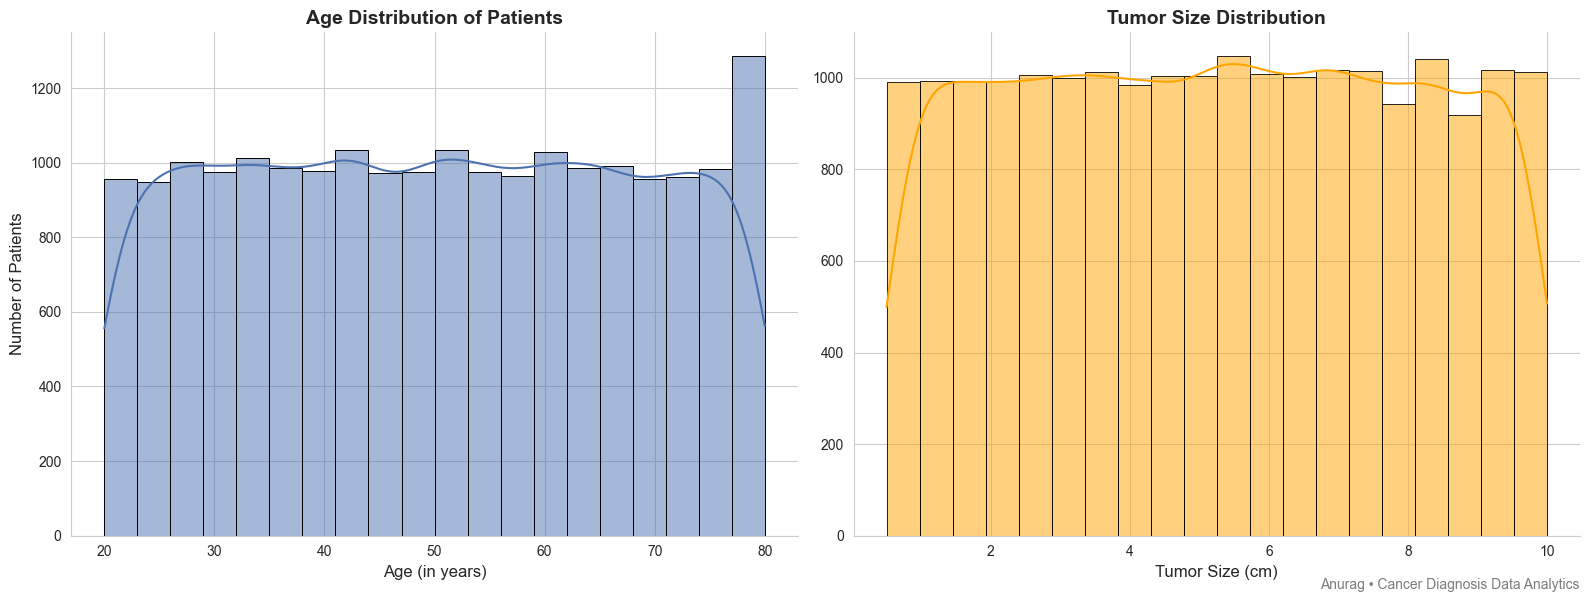

In [24]:
# Set consistent style
sns.set_style("whitegrid")

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Age Distribution
sns.histplot(
    df_pat['Age'], 
    bins=20, 
    kde=True, 
    color="#4C72B0", 
    edgecolor='black', 
    linewidth=0.7, 
    ax=axes[0]
)
axes[0].set_title('Age Distribution of Patients', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age (in years)', fontsize=12)
axes[0].set_ylabel('Number of Patients', fontsize=12)
axes[0].tick_params(axis='both', labelsize=10)
sns.despine(ax=axes[0])

# Plot 2: Tumor Size Distribution
sns.histplot(
    df_pat['Tumor_Size(cm)'], 
    bins=20, 
    kde=True, 
    color='#FFA500', 
    edgecolor='black', 
    linewidth=0.6, 
    ax=axes[1]
)
axes[1].set_title('Tumor Size Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tumor Size (cm)', fontsize=12)
axes[1].set_ylabel('')  # To avoid redundancy
axes[1].tick_params(axis='both', labelsize=10)
sns.despine(ax=axes[1])

# Add project credit at bottom-right corner
fig.text(0.99, 0.01, 'Anurag • Cancer Diagnosis Data Analytics', ha='right', fontsize=10, alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.show()


In [26]:
plt.savefig('cancer_project_distribution_plots.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

C:\Users\angs2\AppData\Local\Temp\ipykernel_7828\2797237601.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pat, x='Gender', palette='pastel', edgecolor='black')


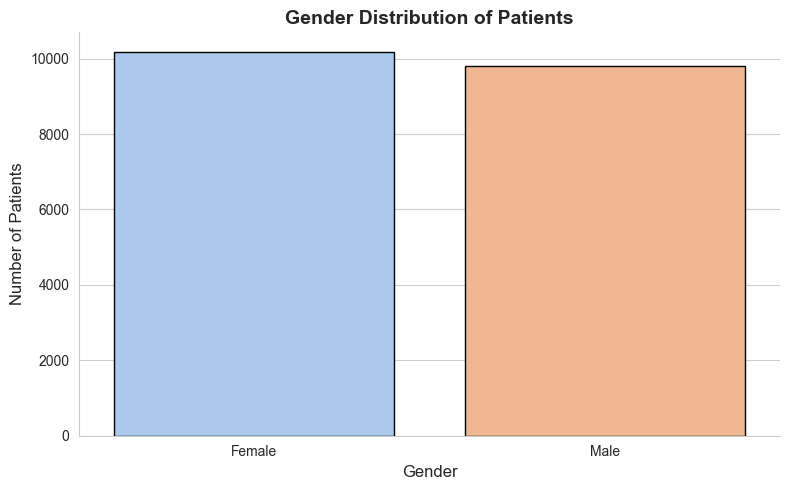

In [28]:
# Set the style
sns.set_style("whitegrid")

# Define figure
plt.figure(figsize=(8, 5))

# Beautified count plot
sns.countplot(data=df_pat, x='Gender', palette='pastel', edgecolor='black')

# Title and labels
plt.title('Gender Distribution of Patients', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Tweak ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Clean look
sns.despine()
plt.tight_layout()
plt.show()


C:\Users\angs2\AppData\Local\Temp\ipykernel_7828\2582170246.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_pat, x='Gender', palette='pastel', edgecolor='black')


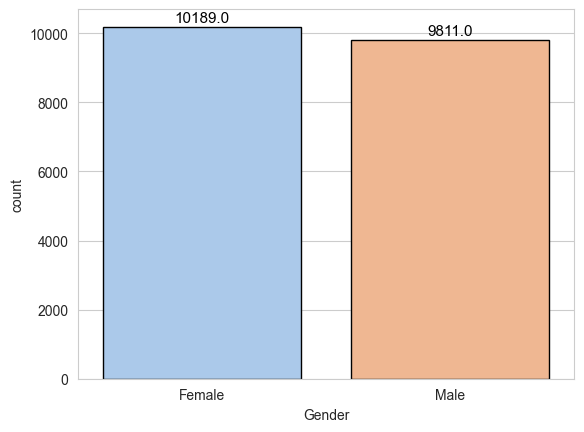

In [29]:
# Add annotations
ax = sns.countplot(data=df_pat, x='Gender', palette='pastel', edgecolor='black')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 6),
                textcoords='offset points')


C:\Users\angs2\AppData\Local\Temp\ipykernel_7828\2603464779.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


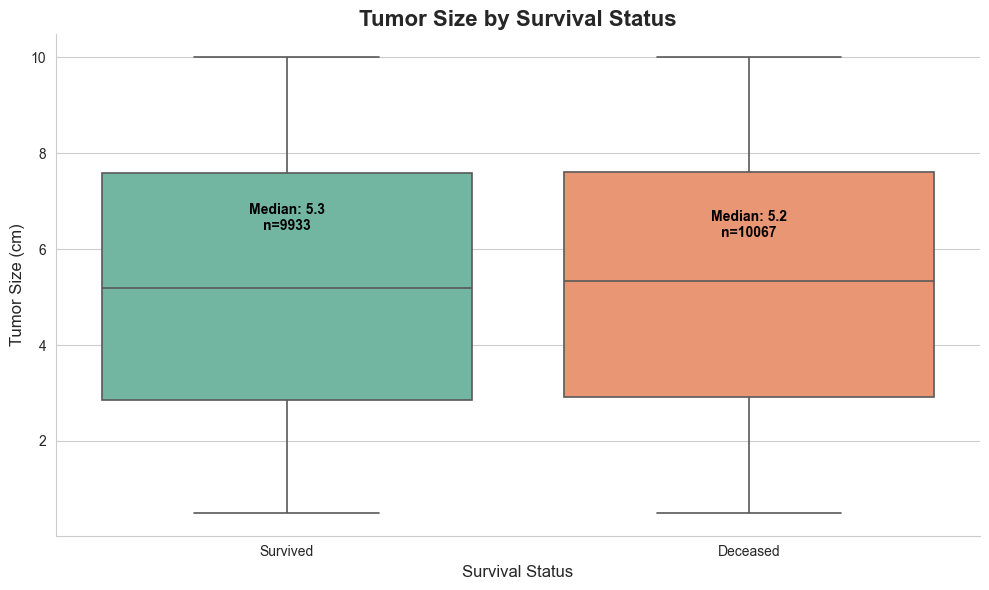

In [31]:
# Set style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='Survival_Status', 
    y='Tumor_Size(cm)', 
    data=df_pat, 
    palette='Set2', 
    linewidth=1.2, 
    fliersize=3
)

# Title and axis labels
plt.title('Tumor Size by Survival Status', fontsize=16, fontweight='bold')
plt.xlabel('Survival Status', fontsize=12)
plt.ylabel('Tumor Size (cm)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

# Add median annotations and sample size
grouped = df_pat.groupby('Survival_Status')['Tumor_Size(cm)']
for i, category in enumerate(grouped.median().index):
    median = grouped.median()[category]
    count = grouped.count()[category]
    ax.text(i, median + 1, f'Median: {median:.1f}\nn={count}', 
            ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Final layout tweak
plt.tight_layout()
plt.show()


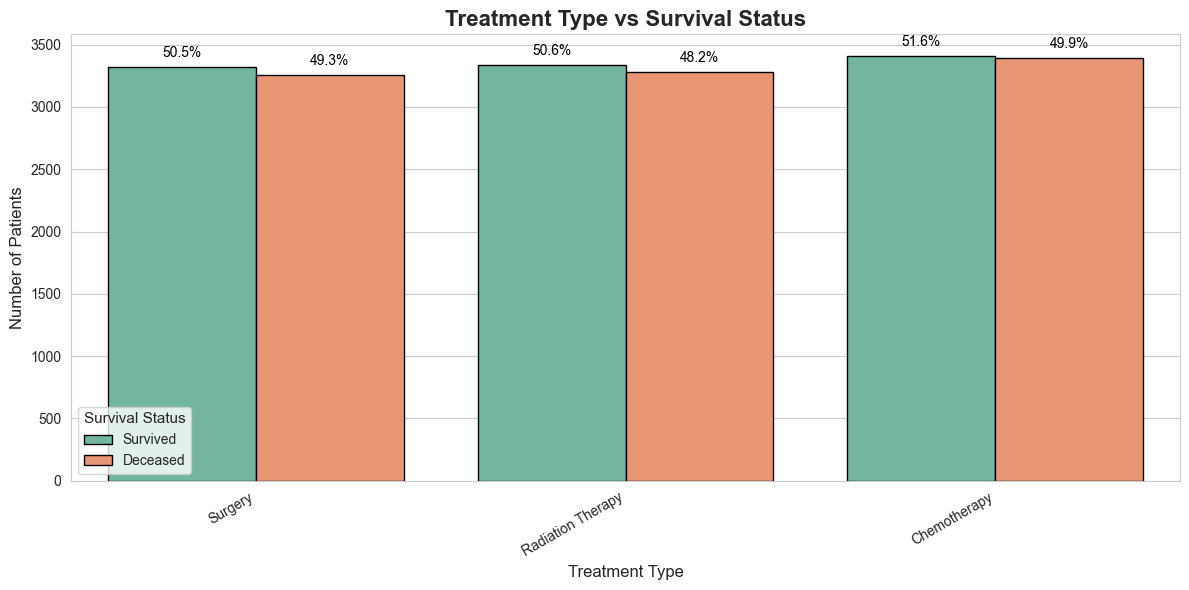

In [32]:
# Set clean style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df_pat,
    x='Treatment',
    hue='Survival_Status',
    palette='Set2',
    edgecolor='black'
)

# Title and labels
plt.title('Treatment Type vs Survival Status', fontsize=16, fontweight='bold')
plt.xlabel('Treatment Type', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Calculate total for each Treatment category
total_per_treatment = df_pat.groupby('Treatment').size()

# Annotate percentages
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        treatment = p.get_x() + p.get_width() / 2.
        treatment_label = p.get_x() + p.get_width() / 2.
        treatment_name = p.get_x()
        treatment_cat = p.get_x()
        treatment = p.get_x() + p.get_width() / 2.
        
        # Find corresponding Treatment name from the bar's center
        treatment_idx = int(p.get_x() + p.get_width() / 2.)
        treatment_label = p.get_x() + p.get_width() / 2.
        
        # Get category from x-tick locations
        treatment_category = p.get_x() + p.get_width() / 2.
        treatment_name = p.get_x()

        # Extract x-label from tick positions
        tick_labels = [tick.get_text() for tick in ax.get_xticklabels()]
        bar_center = p.get_x() + p.get_width() / 2.
        closest_idx = min(range(len(ax.patches)), key=lambda i: abs(ax.patches[i].get_x() + ax.patches[i].get_width()/2 - bar_center))
        treatment_name = tick_labels[int(closest_idx / 2)]  # each treatment appears twice (2 survival statuses)

        total = total_per_treatment.get(treatment_name, 1)  # avoid division by zero
        pct = (height / total) * 100

        ax.annotate(f'{pct:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Legend tweaks
plt.legend(title='Survival Status', title_fontsize=11, fontsize=10)

# Final layout
plt.tight_layout()
plt.show()


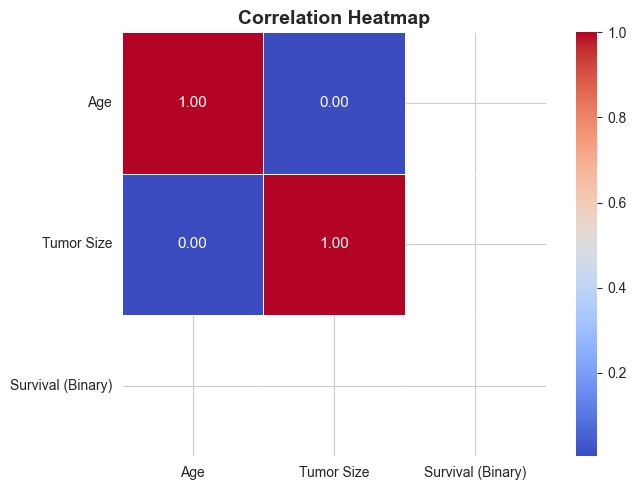

In [34]:
# Set style
sns.set_style("whitegrid")

# Define figure
plt.figure(figsize=(7, 5))

# Beautified heatmap
sns.heatmap(
    corr, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    cbar=True, 
    square=True, 
    linewidths=0.5, 
    linecolor='white', 
    annot_kws={"size": 11}
)

# Title and layout
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

corr.columns = ['Age', 'Tumor Size', 'Survival (Binary)']
corr.index = corr.columns


C:\Users\angs2\AppData\Local\Temp\ipykernel_7828\3470460688.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pat, x='Gender', palette='pastel', edgecolor='black', ax=axes[0, 2])
C:\Users\angs2\AppData\Local\Temp\ipykernel_7828\3470460688.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survival_Status', y='Tumor_Size(cm)', data=df_pat, palette='Set2', linewidth=1.2, fliersize=3, ax=axes[1, 0])


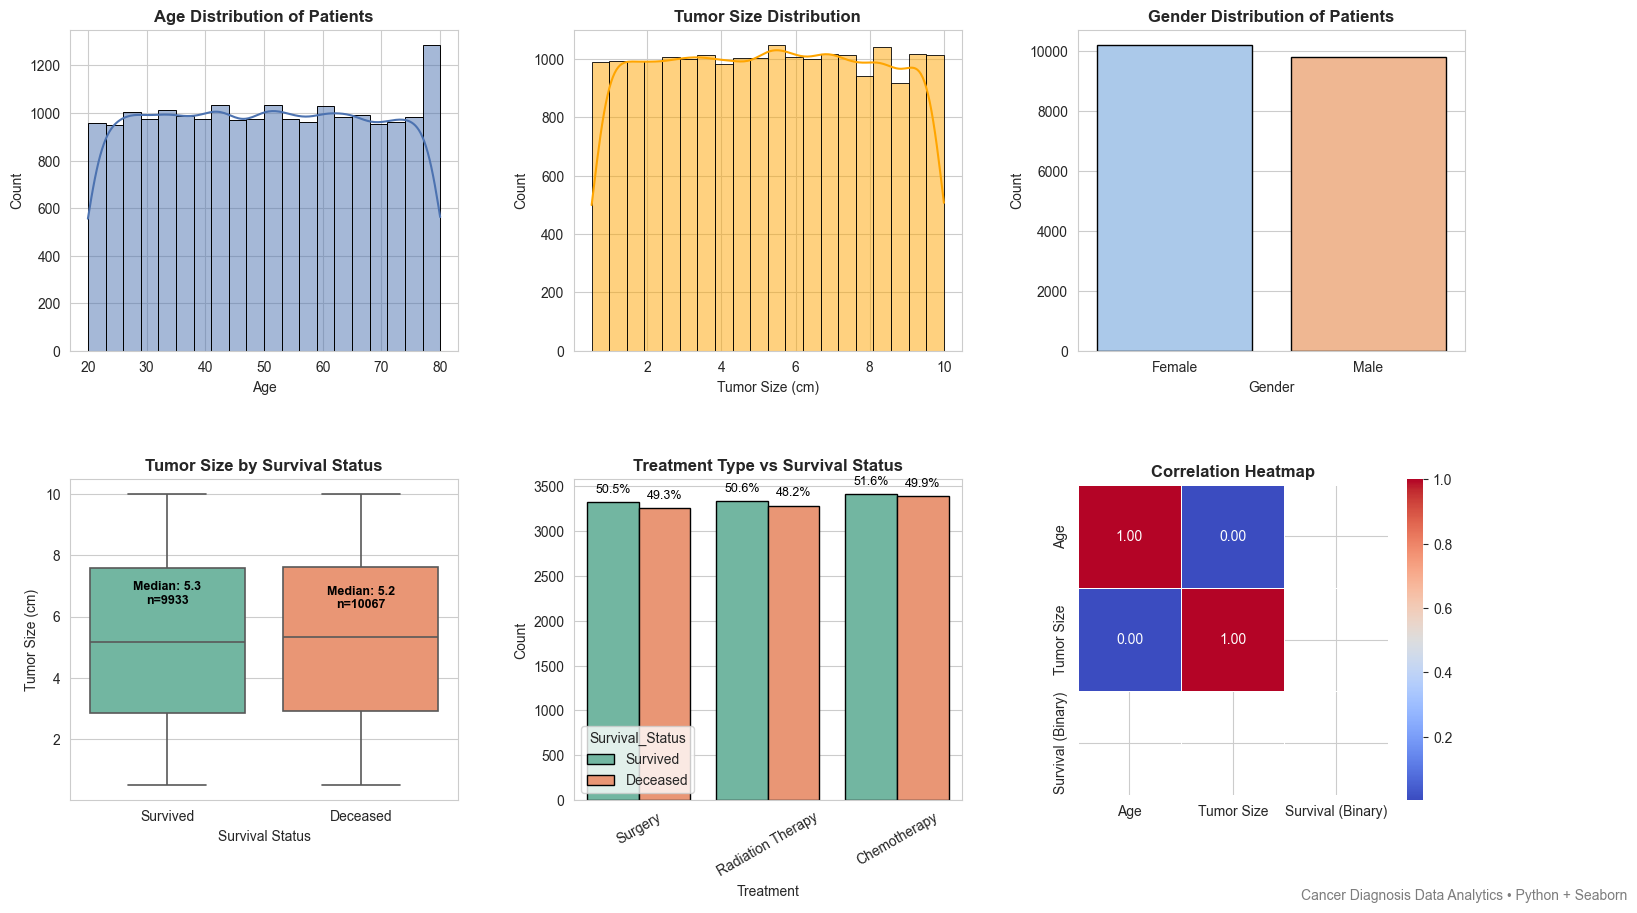

In [36]:
# Set the style
sns.set_style("whitegrid")

# Create 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# ---- 1. Age Distribution ----
sns.histplot(df_pat['Age'], bins=20, kde=True, color="#4C72B0", edgecolor='black', linewidth=0.7, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution of Patients', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# ---- 2. Tumor Size Distribution ----
sns.histplot(df_pat['Tumor_Size(cm)'], bins=20, kde=True, color='#FFA500', edgecolor='black', linewidth=0.6, ax=axes[0, 1])
axes[0, 1].set_title('Tumor Size Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Tumor Size (cm)')
axes[0, 1].set_ylabel('Count')

# ---- 3. Gender Distribution ----
sns.countplot(data=df_pat, x='Gender', palette='pastel', edgecolor='black', ax=axes[0, 2])
axes[0, 2].set_title('Gender Distribution of Patients', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Gender')
axes[0, 2].set_ylabel('Count')

# ---- 4. Tumor Size by Survival ----
sns.boxplot(x='Survival_Status', y='Tumor_Size(cm)', data=df_pat, palette='Set2', linewidth=1.2, fliersize=3, ax=axes[1, 0])
axes[1, 0].set_title('Tumor Size by Survival Status', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Survival Status')
axes[1, 0].set_ylabel('Tumor Size (cm)')

# Add median annotations
grouped = df_pat.groupby('Survival_Status')['Tumor_Size(cm)']
for i, category in enumerate(grouped.median().index):
    median = grouped.median()[category]
    count = grouped.count()[category]
    axes[1, 0].text(i, median + 1, f'Median: {median:.1f}\nn={count}', 
                    ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')

# ---- 5. Treatment vs Survival ----
ax = sns.countplot(data=df_pat, x='Treatment', hue='Survival_Status', palette='Set2', edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title('Treatment Type vs Survival Status', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Treatment')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=30)

# Add percentage annotations
total_per_treatment = df_pat.groupby('Treatment').size()
tick_labels = [tick.get_text() for tick in axes[1, 1].get_xticklabels()]
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        bar_center = p.get_x() + p.get_width() / 2.
        closest_idx = min(range(len(ax.patches)), key=lambda i: abs(ax.patches[i].get_x() + ax.patches[i].get_width()/2 - bar_center))
        treatment_name = tick_labels[int(closest_idx / 2)]
        total = total_per_treatment.get(treatment_name, 1)
        pct = (height / total) * 100
        axes[1, 1].annotate(f'{pct:.1f}%', 
                            (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                            textcoords='offset points')

# ---- 6. Correlation Heatmap ----
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5,
            linecolor='white', annot_kws={"size": 10}, ax=axes[1, 2])
axes[1, 2].set_title('Correlation Heatmap', fontsize=12, fontweight='bold')

# Footer credit
fig.text(0.99, 0.01, 'Cancer Diagnosis Data Analytics • Python + Seaborn', 
         ha='right', fontsize=10, alpha=0.6)

# Save final figure (optional)
# plt.savefig('cancer_diagnosis_dashboard.png', dpi=300, bbox_inches='tight')

plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder

# Copy the original DataFrame to avoid overwriting
data = df_pat.copy()

# Encode categorical variables
le = LabelEncoder()
data['Treatment_Encoded'] = le.fit_transform(data['Treatment'])
data['Survival_Status_Encoded'] = data['Survival_Status'].map({'Survived': 1, 'Deceased': 0})


In [15]:
# Define features and target
X = data[['Age', 'Tumor_Size(cm)', 'Treatment_Encoded']]
y = data['Survival_Status_Encoded']


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [17]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.5055

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.45      0.47      1956
           1       0.51      0.56      0.54      2044

    accuracy                           0.51      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       0.50      0.51      0.50      4000


Confusion Matrix:
 [[ 879 1077]
 [ 901 1143]]
